#  차원 축소
## 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
width=800; height=500

## 1. 차원의 저주

### kaggle('../data/test_encoded.csv')로 search
https://www.kaggle.com/f3nuaimi/senior-project-ii/data?scriptVersionId=10833316

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.0,0.0,0.024538,0.0,0.000000,0.045839,0.0,0.0,0.149685,0.0,...,0.0,0.141402,0.042400,0.0,0.0,0.0,0.028296,0.0,0.044551,0.0
1,0.0,0.0,0.058296,0.0,0.017126,0.091006,0.0,0.0,0.239490,0.0,...,0.0,0.248532,0.086392,0.0,0.0,0.0,0.025259,0.0,0.074349,0.0
2,0.0,0.0,0.051791,0.0,0.012360,0.083106,0.0,0.0,0.221741,0.0,...,0.0,0.227867,0.078469,0.0,0.0,0.0,0.025879,0.0,0.069934,0.0
3,0.0,0.0,0.038092,0.0,0.004549,0.065755,0.0,0.0,0.189635,0.0,...,0.0,0.187429,0.061617,0.0,0.0,0.0,0.028196,0.0,0.057663,0.0
4,0.0,0.0,0.040451,0.0,0.006021,0.069720,0.0,0.0,0.194577,0.0,...,0.0,0.194506,0.064851,0.0,0.0,0.0,0.027344,0.0,0.060139,0.0


(49342, 200)

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

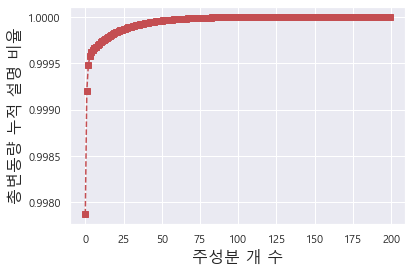

In [2]:
test = pd.read_csv('../data/test_encoded.csv')
test.head(); test.shape

from sklearn.decomposition import PCA
plt.rcParams['font.family']='Malgun Gothic'
pca = PCA().fit(test)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

## 2.1 주성분 개념

- 2차원의 200개 무작위 샘플

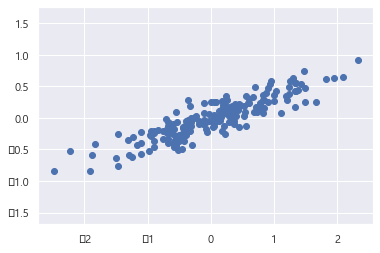

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

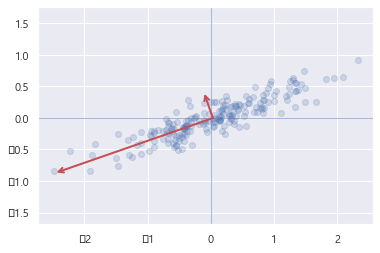

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

##### 원래 데이터의 기저벡터(base vector)인 (1,0), (0,1)에서 관측된 x1, x2의 분산은 

  * 새로운 주성분(principal components) 벡터(화살표)에서 주성분 1과 2에 의해 표현될 수 있고(*principal axes*으로 자료 변환)
  * 원래 데이터의 총변동량(원래 데이터의 평균조정된 데이터의 내적(공분산)의 trace(x1, x1의 분산의 합))의 
  * 77%를 주성분 1은 76%, 1%를 각각 설명한다.


##### 즉 원래데이터는 새로운 기저벡터인 주성분벡터에서 projection(data representation, transformation)이 되었다.
* The transformation from data axes to principal axes)
   * affine transformation, which is composed of a translation, rotation, and uniform scaling.

<font color='red'> 주성분(components) 행렬은 2개의 직교벡터 (-0.9444, -0.3286)과 (-0.3286, 0.9444)로 구성

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


<font color='red'> 주성분 행렬은 직교행렬(Orthogonal matrix)로 직교행렬의 내적은 Identity 행렬

In [7]:
(pca.components_.T@pca.components_).round(2)

array([[ 1., -0.],
       [-0.,  1.]])

<font color='red'> 주성분의 총변동량에 대한 설명비율(explained variance)은 2개 직교벡터의 화살표 크기

In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


## 2.2 차원축소(dimensionality reduction)

- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=1)

original shape:    (200, 2)
transformed shape: (200, 1)


##### 2차원의 원자료를 1차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

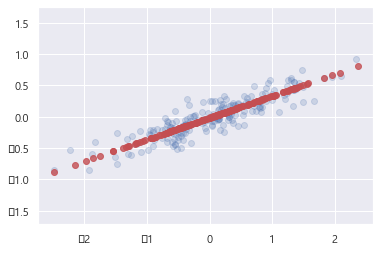

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## 2.3 주성분 분석(PCA)과 시각화

In [11]:
X1 = np.array([int(num) for num in np.linspace(0, 15, 10)]).reshape(2,5)
X2 = np.array([int(num) for num in np.linspace(20, 55, 10)]).reshape(2,5)
X = np.concatenate((X1, X2))
X

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

## Importance of Feature Scaling
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean().round(2)}, 표준펀차: {X_scaled.std()}')

평균: 0.0, 표준펀차: 1.0


In [13]:
np.dot(X_scaled.T, X_scaled).round(2) # X_scaled.T@X_scaled
print(f'총변동량은: {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[4.  , 4.  , 3.99, 3.99, 3.98],
       [4.  , 4.  , 4.  , 3.99, 3.98],
       [3.99, 4.  , 4.  , 4.  , 3.99],
       [3.99, 3.99, 4.  , 4.  , 4.  ],
       [3.98, 3.98, 3.99, 4.  , 4.  ]])

총변동량은: 20.0


In [14]:
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)

In [16]:
pca.explained_variance_ratio_

array([9.98493116e-01, 1.43601776e-03, 7.08661701e-05, 3.99430884e-33])

Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

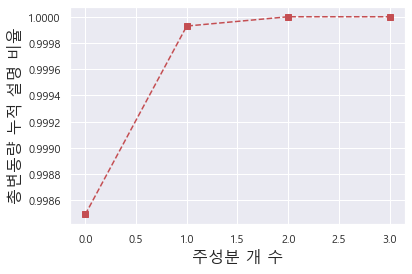

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [18]:
pca = PCA(n_components=1)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

PCA(n_components=1)

총변동량 설명비율 (%) : [99.85]


In [19]:
(X_pca.T@X_pca).round(2)
print(f'공분산은: {np.trace(np.dot(X_pca.T, X_pca))}')
(np.trace(np.dot(X_pca.T, X_pca))/20)*100

array([[19.97]])

공분산은: 19.969862321486808


99.84931160743405

## 4. 주성분 분석(PCA)과 SVD(singular value decomposition)
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

numpy.ndarray

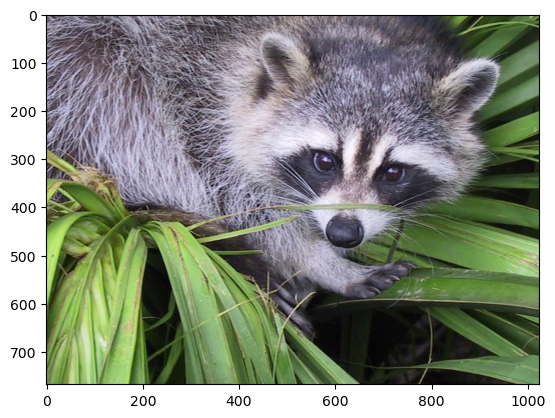

In [20]:
from scipy import misc
sns.reset_defaults() 
img = misc.face()
type(img)
plt.imshow(img)

In [21]:
img.shape
img.ndim
pd.DataFrame(img[:, :, 0])

(768, 1024, 3)

3

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,121,138,153,155,155,158,159,156,147,137,...,170,163,159,150,135,121,116,119,131,139
1,89,110,130,137,141,148,152,151,164,154,...,161,155,147,136,121,109,107,118,134,146
2,73,94,115,123,127,131,132,129,139,135,...,151,143,124,116,108,102,104,117,133,144
3,81,97,113,120,125,126,120,111,101,101,...,131,119,100,101,103,107,110,116,121,125
4,103,113,123,132,142,147,140,127,109,101,...,101,89,93,97,106,112,115,112,108,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,110,97,92,101,115,119,117,118,106,114,...,117,116,117,117,117,118,118,118,118,118
764,98,93,98,114,122,120,115,116,116,122,...,117,116,118,119,119,119,120,120,120,119
765,87,94,107,123,127,121,117,118,122,126,...,124,123,118,119,120,121,121,120,119,119
766,85,95,112,123,127,124,123,123,124,129,...,122,124,118,118,119,122,122,121,120,120


In [22]:
img_array = img / 255
img_array.shape
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024, 3)

(768, 1024)

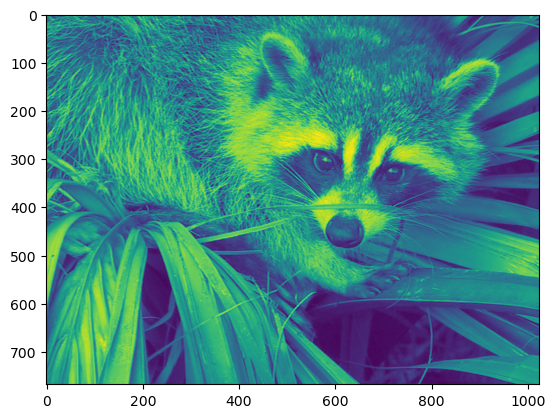

In [23]:
plt.imshow(img_gray)

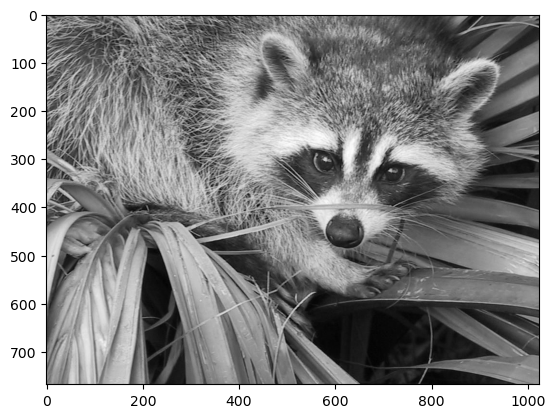

In [24]:
plt.imshow(img_gray, cmap="gray")

In [25]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

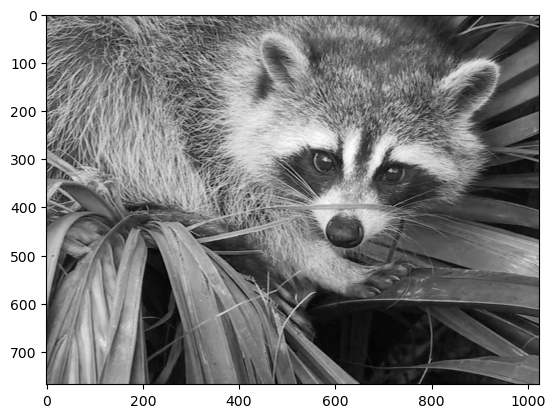

In [26]:
plt.imshow(red_array, cmap="gray")

## Eigen vector와 PCA

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/25d526099011bbd1f25ca18d062053b519c4ca1c'>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/500px-Eigenvalue_equation.svg.png'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/400px-Eigenvectors_of_a_linear_operator.gif'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif'>

## 5. PCA for visualization: Hand-written digits

고차원 자료인 수기체 이미지에 PCA 적용

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

- 8×8 pixel images 자료, 총 64차원

In [28]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인

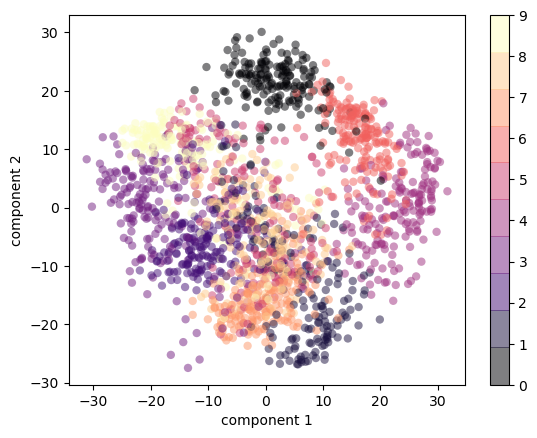

In [29]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

### 최적의 주성분 개수 구하기

총 누적 변동량(cumulative *explained variance ratio*)과 주성분의 개수:

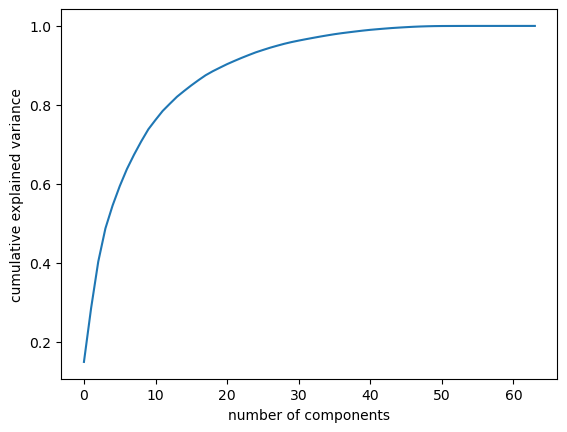

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

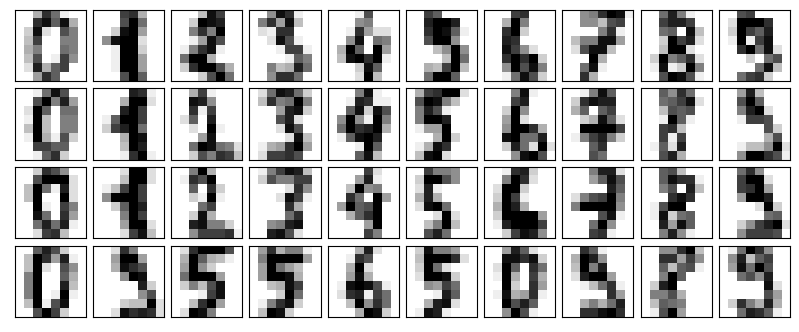

In [31]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

잡음(noise)를 발생시켜 데이터에 주입

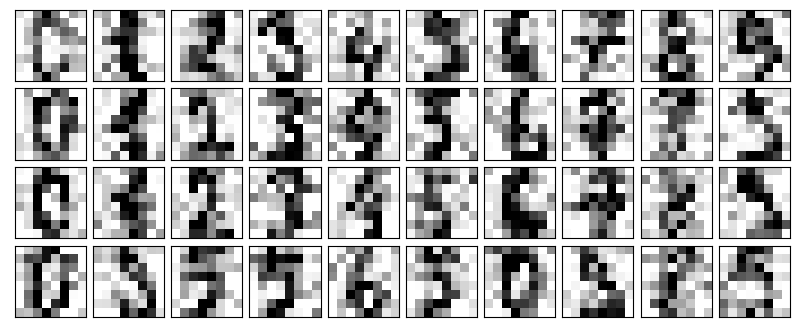

In [32]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출

In [33]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원

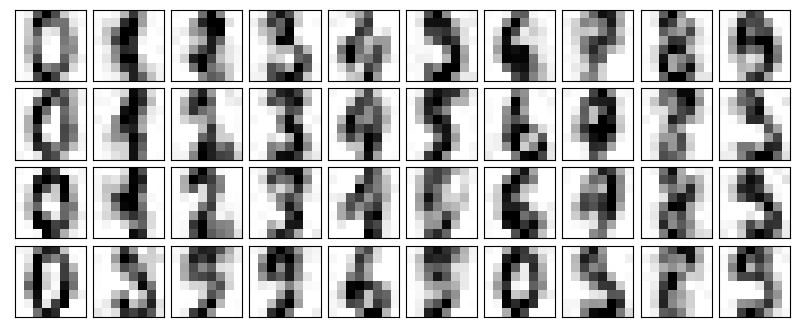

In [34]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

## 6  Eigenfaces

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [36]:
from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import RandomizedPCA

In [37]:
pca = TruncatedSVD(150)
pca.fit(faces.data)

TruncatedSVD(n_components=150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

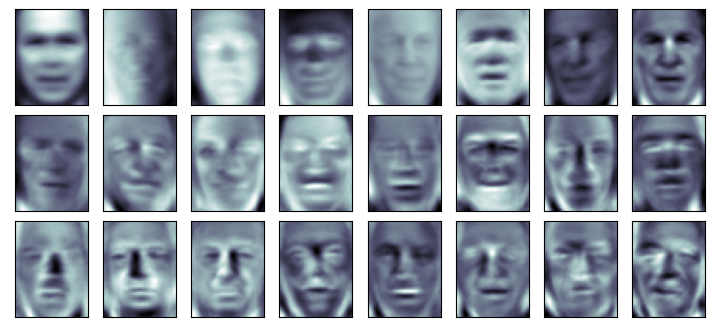

In [38]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

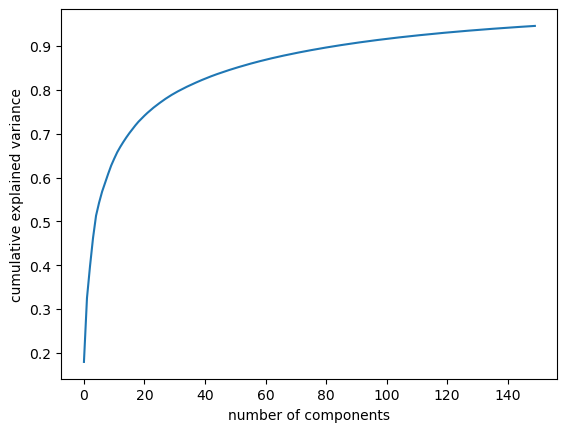

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

In [40]:
# Compute the components and projected faces
pca = TruncatedSVD(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

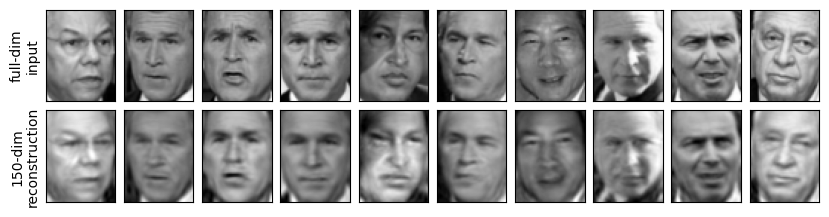

In [41]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# END